# 🛺 Predicting the sale price of bulldozer using machine learning

In this notebook,

we're going through an example machine learning project , with the goal of predicting the sale price of bulldozer

# 1.Problem Definition

How well can we predict the future sale price of bulldozer,

given it's characteristics and previous exampleof how much similiar bulldozer have been sold for

# 2.Data
The data is downloaded from the Kaggle Bluebook for bulldozer

https://www.kaggle.com/c/bluebook-for-bulldozers

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

# 3.Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more the evaluation of this project check:
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most evaluation metrics is to minimize the error. For example, our goal of this project will be to build a machine learning model which minimises RMSLE.

# 4.Features
Kaggle provides a data dictionary detailling all of the features of the data set. You can view the data on google sheets:
https://docs.google.com/spreadsheets/d/1PBbIaDOW2fgmGSLyr0XC6tbM5ZJ5nmLBT7axWF8Jcc4/edit?usp=sharing

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data exploration(Exploratory data analysis)

In [57]:
#Import train and validation set
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                low_memory=False)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [59]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

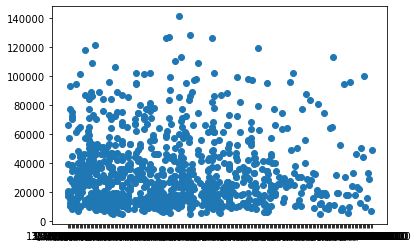

In [60]:
fig, ax = plt.subplots()

ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

<AxesSubplot:ylabel='Frequency'>

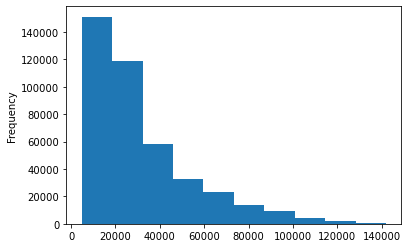

In [61]:
df['SalePrice'].plot.hist()

### Parsing date
When we're working on time series data , we want to enrich the time & date component as much as possible

We can do that by teliing pandas which of our columns has dates in it using the `parse date` parameter

In [62]:
#Import the data again but with parse date
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                 low_memory=False,
                 parse_dates=['saledate'])

In [63]:
df.saledate.dtype

dtype('<M8[ns]')

In [64]:
df['saledate'][:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

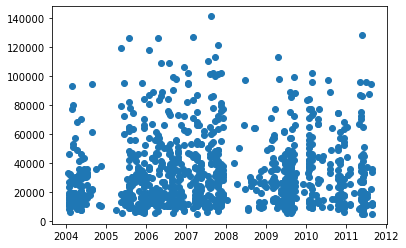

In [65]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [66]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [67]:
df['saledate'].head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

### Sort the Dataframe by saledate
When working with time series data, it's a good idea to sort it by date

In [68]:
#Sort dataframe in date order
df.sort_values(by=['saledate'], ascending=True, inplace=True)

In [69]:
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of our original dataframe
we make a copy of our orginal data frame 

so when we're manipulating our dataframe,we've still got our original data

In [70]:
#Make a copy
df_tmp = df.copy()

In [71]:
df_tmp['saledate']

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

### Add datetime parameter for `saledate` column

In [72]:
df_tmp['saleYear'] = df_tmp['saledate'].dt.year
df_tmp['saleMonth'] = df_tmp['saledate'].dt.month

df_tmp['saleDay'] = df_tmp['saledate'].dt.day

df_tmp['saleDayOfWeek'] = df_tmp['saledate'].dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp['saledate'].dt.dayofyear

In [73]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [74]:
#Now we enriched our dataframe with date time features,we can remove saledate columns
df_tmp.drop('saledate', axis=1,inplace=True)

In [75]:
# Check the value of different columns
df_tmp['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

# 5.Modeling
We've done enough EDA, and we can do more if we want, but for now let's try Model Driven EDA

In [76]:
#Try basic model
from sklearn.ensemble import RandomForestRegressor

#let's instantiate model
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

ValueError: could not convert string to float: 'Low'

## 1.Get the data ready
Since our data is not in numerical value and there are missing value,

we'll do this following steps:
1. Converting
2. Filling
3. Splitting

### 1.1 Converting
One way to turn all of our data into number is by converting the data into panda categories

We can check the different datatypes compatible with panda here:
https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html

In [ ]:
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

In [ ]:
# Find the columns which contain string
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)


### Converting string value

In [77]:
# This will turn all of the string value into categories dtype

for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

        
# for label,content in df_tmp.items():
#     if pd.api.types.is_string_dtype(content):
#         transformer = ColumnTransformer([
#             ('onehot',onehot, content)
#         ])
        
#         trans_X_train = transformer.fit_transform(X_train),
#         trans_X_test = transformer.fit_transforrm(X_test)

In [78]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [79]:
df_tmp['Stick_Length'][100: 200]

100355    NaN
170700    NaN
170673    NaN
28222     NaN
100432    NaN
         ... 
239451    NaN
167548    NaN
235772    NaN
235744    NaN
52561     NaN
Name: Stick_Length, Length: 100, dtype: category
Categories (29, object): ['10' 10"' < '10' 2"' < '10' 6"' < '11' 0"' ... '9' 6"' < '9' 7"' < '9' 8"' < 'None or Unspecified']

In [80]:
df_tmp['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [81]:
df_tmp['state'].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas Categories we now have a way to acces all of our data in the form of number

But we still have a bunch of missing data

In [82]:
#Check missing data
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preproccesed data



In [83]:
#Export current tmp dataframe
df_tmp.to_csv('data/bluebook-for-bulldozers/categories_train_tmp.csv',
             index=False)

In [84]:
#Import preproccesed data
df_tmp = pd.read_csv('data/bluebook-for-bulldozers/categories_train_tmp.csv',
                    low_memory=False)

In [85]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Filling the missing value

### Filling the numerical missing value

In [86]:
#How do we select columns with numeric value = by using loops and conditional logic
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [87]:
#Select only the numeric  with missing value
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [88]:
#Select only the numeric  with missing value
for label,content in df_tmp.items():
    
    if pd.api.types.is_numeric_dtype(content):
        
        if pd.isnull(content).sum():
            
            #Add a binary column which tells us if the data was missing or not
            df_tmp[label+ '_is_missing'] = pd.isnull(content)  
            
            #Filling the missing value with median
            df_tmp[label] = content.fillna(content.median())

In [89]:
# Demonstrate how median is robust than mean
hundreds = np.full((1000,), 100)
hundreds_billions = np.append(hundreds, 1000000000)

np.mean(hundreds), np.mean(hundreds_billions), np.median(hundreds), np.median(hundreds_billions)

(100.0, 999100.8991008991, 100.0, 100.0)

In [90]:
#Check is there missing value on numerical columns
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [91]:
#Check to see how many example were missing
df_tmp['auctioneerID_is_missing'].value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

### Filling the categorical value

In [92]:
#Only select the missing value except Numeric
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label) #Print missing value label with no numeric dtype

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [93]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [94]:
pd.Categorical(df_tmp['state']).codes 

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [95]:
pd.Categorical(df_tmp['UsageBand']).codes+ 1

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [96]:
#Turn categorical variable into number and filling missing value
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        
        #Add binary column to indicate whether sample had missing value
        df_tmp[label + '_is_missing'] = pd.isnull(content) #value =True or false whether Missing or not
        
        #Turn categories into number and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1
        

In [97]:
#Check is there any mising value in catogries
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [98]:
df_tmp['Blade_Type'].head(10).T

0    8
1    0
2    8
3    0
4    6
5    8
6    0
7    0
8    6
9    0
Name: Blade_Type, dtype: int8

In [99]:
pd.api.types.is_categorical_dtype(df_tmp['Blade_Type'])

False

Now that all of the data is numeric as well as our dataframe has no missing value, 

we should be able to build a machine learning model

In [100]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [101]:
len(df_tmp)

412698

In [104]:
%%time

from sklearn.ensemble import RandomForestRegressor

#Instantiate the model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

#Fit the model to the data
model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

Wall time: 5min 19s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [105]:
model.score(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

0.9875468079970562

**Question:** Why doesn't the above metric hold water? (Why is'nt the metric reliable)

**Answer:** Because we have'nt split our data yet

## Splitting data

In [106]:

#Split data into train and validation
df_train = df_tmp[df_tmp.saleYear != 2012]
df_val  = df_tmp[df_tmp.saleYear == 2012]

#Why did we split into train and valid first, not split into X,y instead?
#Because we want to sort our data using Date


len(df_train), len(df_val)

(401125, 11573)

In [107]:
#Split into Features and label
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']

X_val, y_val = df_val.drop('SalePrice', axis=1), df_val['SalePrice']

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Build an evaluation function

In [108]:
#Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle(y_true,y_preds):
    '''
    Calculate root mean squared log error between true and predictions label
    '''
    
    return np.sqrt(mean_squared_log_error(y_true, y_preds))

def show_scores(model):
    
    train_preds = model.predict(X_train)
    val_preds =  model.predict(X_val)
    
    score = {
        'Train MAE': mean_absolute_error(y_train, train_preds),
        'Val MAE': mean_absolute_error(y_val, val_preds),
        'Train RMSLE': rmsle(y_train, train_preds),
        'Val RMSLE': rmsle(y_val, val_preds),
        'Training R^2': r2_score(y_train, train_preds),
        'Val R^2': r2_score(y_val, val_preds)
    }
    return score



##  Testing our model on subset(to tune the hyperparameter)
By using **max_samples parameter**

In [109]:
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)

model.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': 10000,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [110]:
%%time
# Cutting down on the max number of samples each estimators can see improve

model.fit(X_train, y_train)

Wall time: 13.3 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [111]:
len(df_tmp)

412698

In [112]:
(X_train.shape[0] *100) / 1000000

40.1125

In [113]:
10000* 100

1000000

In [114]:
show_scores(model)

{'Train MAE': 5561.2988092240585,
 'Val MAE': 7177.26365505919,
 'Train RMSLE': 0.257745378256977,
 'Val RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Val R^2': 0.8320374995090507}

## Tuning hyperparameters with RandomizedSearchCV

In [115]:
%%time
from sklearn.model_selection import RandomizedSearchCV

#Different RandomForestRegressor hyperparameters
rf_grid = {
    'n_estimators': np.arange(10,100,10),
    'max_depth': [None,3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [0.5, 1, 'sqrt', 'auto'],
    'max_samples': [10000]
}


#Instantiate RS model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                             param_distributions=rf_grid,
                             cv=5,
                             n_iter=2,
                             verbose=True)

#Fit the rs model to data
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 56.6 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [116]:
rs_model.best_params_, show_scores(rs_model)

({'n_estimators': 50,
  'min_samples_split': 16,
  'min_samples_leaf': 19,
  'max_samples': 10000,
  'max_features': 'sqrt',
  'max_depth': None},
 {'Train MAE': 8768.450200185944,
  'Val MAE': 10452.28244379019,
  'Train RMSLE': 0.3835801368031311,
  'Val RMSLE': 0.4134831194141047,
  'Training R^2': 0.6899202456913072,
  'Val R^2': 0.6816876438109437})

## Train model with the best hyperparameters

**Note:** These were found after 100 iterations of `RandomizedSearchCV`

In [117]:
%%time

#Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) #random_state so our model is reproduceable

#Fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 57.9 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [118]:
#Score for ideal model (train on all the data)
show_scores(ideal_model)

{'Train MAE': 2953.8161137163484,
 'Val MAE': 5951.247761444453,
 'Train RMSLE': 0.14469006962371858,
 'Val RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Val R^2': 0.8818019502450094}

In [119]:
#Score on rs model (only trained on ~10.000 example)
show_scores(rs_model)

{'Train MAE': 8768.450200185944,
 'Val MAE': 10452.28244379019,
 'Train RMSLE': 0.3835801368031311,
 'Val RMSLE': 0.4134831194141047,
 'Training R^2': 0.6899202456913072,
 'Val R^2': 0.6816876438109437}

## Making prediction on Test Data

In [143]:
#import the test data
df_test = pd.read_csv('data/bluebook-for-bulldozers/Test.csv',
                      low_memory=False,
                      parse_dates=['saledate'])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [121]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [122]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

## Preprocesssing the data
Getting the test data in the same format as our training datasets

### Fixing our mistake(We need to spliting it first before filling)

In [137]:
def preprocess_train_val(df):
    '''
    Performs transformations on df and returns transformed df.
    '''
    df['saleYear'] = df['saledate'].dt.year
    df['saleMonth'] = df['saledate'].dt.month
    df['saleDay'] = df['saledate'].dt.day
    df['saleDayOfWeek'] = df['saledate'].dt.dayofweek
    df['saleDayOfYear'] = df['saledate'].dt.dayofyear
    
    df.drop('saledate', axis=1, inplace=True)
   
    #Convert the string into num(pd.categories)
    for label,content in df.items():
        if pd.api.types.is_string_dtype:
            df[label] = content.astype('category').cat.as_ordered()
            
    #Splitting data into train and val
    df_train = df[df.saleYear != 2012]
    df_val = df[df.saleYear == 2012]
    
    
    #Fill the numeric rows with median in df_train
    for label,content in df_train.items():
    
        if pd.api.types.is_numeric_dtype(content):
        
            if pd.isnull(content).sum():
            
                #Add a binary column which tells us if the data was missing or not
                df_train[label+ '_is_missing'] = pd.isnull(content)  
            
                #Filling the missing value with median
                df_train[label] = content.fillna(content.median())
                
     #Fill the numeric rows with median in df_val
    for label,content in df_val.items():
    
        if pd.api.types.is_numeric_dtype(content):
        
            if pd.isnull(content).sum():
            
                #Add a binary column which tells us if the data was missing or not
                df_val[label+ '_is_missing'] = pd.isnull(content)  
            
                #Filling the missing value with median
                df_val[label] = content.fillna(content.median())
                
                
    
    #Filled the categorical missing data and turn categories into numbers in df_train
    for label,content in df_train.items():
        if not pd.api.types.is_numeric_dtype(content):
            df_train[label + '_is_missing'] = pd.isnull(content)
            
            df_train[label] = pd.Categorical(content).codes + 1
            
            
            
    #Filled the categorical missing data and turn categories into numbers in df_val
    for label,content in df_val.items():
        if not pd.api.types.is_numeric_dtype(content):
            df_val[label + '_is_missing'] = pd.isnull(content)
            
            df_val[label] = pd.Categorical(content).codes + 1
            
    
    #Split into Features and label
    X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']

    X_val, y_val = df_val.drop('SalePrice', axis=1), df_val['SalePrice']
            
            
    
    return df

In [138]:
#Make a copy again 
#Because we were wrong when preprocessed our data before
df_tmp = df.copy()

In [139]:
df_tmp = preprocess_train_val(df_tmp)

<ipython-input-137-1e33955b3d15>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label + '_is_missing'] = pd.isnull(content)
<ipython-input-137-1e33955b3d15>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label] = pd.Categorical(content).codes + 1
<ipython-input-137-1e33955b3d15>:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented

In [140]:
show_scores(ideal_model)

{'Train MAE': 2953.8161137163484,
 'Val MAE': 5951.247761444453,
 'Train RMSLE': 0.14469006962371858,
 'Val RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Val R^2': 0.8818019502450094}

### Preprocess Test data

In [141]:
def preprocess_test(df):
    '''
    Performs transformations on test df and returns transformed df.
    '''
    df['saleYear'] = df['saledate'].dt.year
    df['saleMonth'] = df['saledate'].dt.month
    df['saleDay'] = df['saledate'].dt.day
    df['saleDayOfWeek'] = df['saledate'].dt.dayofweek
    df['saleDayOfYear'] = df['saledate'].dt.dayofyear
    
    df.drop('saledate', axis=1, inplace=True)
   
    
    
    #Fill the numeric rows with median 
    for label,content in df_test.items():
    
        if pd.api.types.is_numeric_dtype(content):
        
            if pd.isnull(content).sum():
            
                #Add a binary column which tells us if the data was missing or not
                df_test[label+ '_is_missing'] = pd.isnull(content)  
            
                #Filling the missing value with median
                df_test[label] = content.fillna(content.median())
                
                 
    
    #Filled the categorical missing data and turn categories into numbers in df_train
    for label,content in df_test.items():
        if not pd.api.types.is_numeric_dtype(content):
            df_test[label + '_is_missing'] = pd.isnull(content)
            
            df_test[label] = pd.Categorical(content).codes + 1
            
    return df     

In [144]:
df_test = preprocess_test(df_test)

In [150]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=101)

In [149]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

In [151]:
test_predict= ideal_model.predict(df_test)

ValueError: X has 101 features, but DecisionTreeRegressor is expecting 102 features as input.

In [152]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [154]:
#Manually adjust df_test to have auctioonerID_is_missing columns
df_test['auctioneerID_is_missing'] = False

In [156]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally now our test dataframe has the same features as our training dataframe, we can make prediction

In [157]:
#Make prediction on test data
test_preds = ideal_model.predict(df_test)

In [158]:
test_preds

array([20614.36780887, 19897.80170658, 44852.21959446, ...,
       14296.98620472, 22164.85757662, 31683.80063427])

We've made some prediction but they're not yet in the same format kaggle is asking for:

https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [159]:
#Format prediction into the same format as kaggle is after
# Creating data frame with salesid and sale predict columns

df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalePrice'] = test_preds

df_preds.head()

,SalesID,SalePrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708


In [160]:
#Export prediction data
df_preds.to_csv('data/bluebook-for-bulldozers/test-predictions.csv', index=False)

## Features importance
Features importance seeks to figure out which different attributes of the data 
were most importance 

when it comes to predicting the **target variable** (SalePrice)

In [167]:
(ideal_model.feature_importances_)

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [185]:
#Helper function for plotting features importance
def plot_features(columns, importances, n=20 ):
    df = (pd.DataFrame({'features': columns,
                         'feature_importances': importances})
          .sort_values('feature_importances', ascending=False)
          .reset_index(drop=True))
    
    #Plot features importance
    fig,ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:20])
    
    ax.set(xlabel='Features',
           ylabel='Features importance')
    
    ax.invert_yaxis()

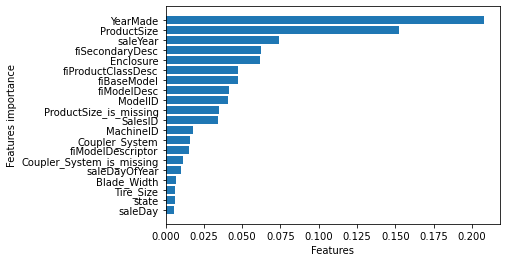

In [186]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [193]:
df['Enclosure'].value_counts()

OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64

# 6.Experimentation

**Question to finish:** Why might knowing the feature importance of trained machine learning model be helpfull?

**Answer:** Because when we know what is the most important features, we can focus try to improve the features so we can get better prediction



**Final Challange:** What other machine learning model could you try on our dataset? 

Hint:https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

and try to look like catboost.ai, and XGboost.ai

### Model comparison

In [199]:
#Instal XGB, Catboost
!pip install xgboost
!pip install catboost

  Using cached xgboost-1.4.2-py3-none-win_amd64.whl (97.8 MB)
  Using cached catboost-0.26.1-cp39-none-win_amd64.whl (67.9 MB)
  Using cached graphviz-0.17-py3-none-any.whl (18 kB)
  Using cached plotly-5.3.1-py2.py3-none-any.whl (23.9 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [205]:
#Import
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

In [223]:
%%time
model_dict = {
    'Catboost' : CatBoostRegressor(),
#     'XGB': XGBRegressor(),
    'SVR': SVR()
}

#Empty dict for result
model_score = {}

for name,model in model_dict.items():
    
    np.random.seed(42)
    
    model.fit(X_train[:10000],y_train[:10000])
    
    
    y_preds = model.predict(X_val)
    
    model_score[name]= rmsle(y_val, y_preds)
    
    
    
    

Learning rate set to 0.058803
0:	learn: 21005.5752657	total: 10.8ms	remaining: 10.8s
1:	learn: 20238.6618524	total: 18.9ms	remaining: 9.44s
2:	learn: 19507.6997920	total: 26.9ms	remaining: 8.95s
3:	learn: 18834.5545216	total: 34.6ms	remaining: 8.61s
4:	learn: 18194.6509303	total: 42.2ms	remaining: 8.4s
5:	learn: 17614.9620996	total: 49.9ms	remaining: 8.27s
6:	learn: 17099.9022745	total: 58.1ms	remaining: 8.24s
7:	learn: 16577.0185826	total: 65.8ms	remaining: 8.16s
8:	learn: 16113.1044730	total: 73.5ms	remaining: 8.09s
9:	learn: 15672.6212175	total: 81ms	remaining: 8.02s
10:	learn: 15288.7862286	total: 88.3ms	remaining: 7.94s
11:	learn: 14895.9968528	total: 95.8ms	remaining: 7.89s
12:	learn: 14530.3014164	total: 103ms	remaining: 7.85s
13:	learn: 14195.3673862	total: 111ms	remaining: 7.82s
14:	learn: 13910.7297360	total: 119ms	remaining: 7.78s
15:	learn: 13617.7485615	total: 126ms	remaining: 7.78s
16:	learn: 13350.0829785	total: 134ms	remaining: 7.75s
17:	learn: 13099.9964625	total: 142m

158:	learn: 7677.6546670	total: 1.25s	remaining: 6.62s
159:	learn: 7668.9876124	total: 1.26s	remaining: 6.61s
160:	learn: 7662.1735140	total: 1.27s	remaining: 6.6s
161:	learn: 7651.3276588	total: 1.27s	remaining: 6.6s
162:	learn: 7640.4553185	total: 1.28s	remaining: 6.59s
163:	learn: 7631.9087942	total: 1.29s	remaining: 6.58s
164:	learn: 7617.9130820	total: 1.3s	remaining: 6.58s
165:	learn: 7606.2245000	total: 1.31s	remaining: 6.57s
166:	learn: 7594.9708906	total: 1.32s	remaining: 6.57s
167:	learn: 7582.5072305	total: 1.32s	remaining: 6.56s
168:	learn: 7572.2412948	total: 1.33s	remaining: 6.55s
169:	learn: 7561.3113386	total: 1.34s	remaining: 6.53s
170:	learn: 7551.9462943	total: 1.34s	remaining: 6.52s
171:	learn: 7538.8434426	total: 1.35s	remaining: 6.51s
172:	learn: 7527.9973776	total: 1.36s	remaining: 6.5s
173:	learn: 7515.6449979	total: 1.37s	remaining: 6.49s
174:	learn: 7510.4976292	total: 1.38s	remaining: 6.48s
175:	learn: 7498.4391365	total: 1.38s	remaining: 6.47s
176:	learn: 74

315:	learn: 6641.2211929	total: 2.55s	remaining: 5.53s
316:	learn: 6634.1959009	total: 2.58s	remaining: 5.55s
317:	learn: 6624.4752973	total: 2.58s	remaining: 5.54s
318:	learn: 6622.0554735	total: 2.59s	remaining: 5.53s
319:	learn: 6617.5140029	total: 2.6s	remaining: 5.52s
320:	learn: 6612.5094423	total: 2.61s	remaining: 5.51s
321:	learn: 6609.4895338	total: 2.61s	remaining: 5.5s
322:	learn: 6603.5424142	total: 2.62s	remaining: 5.49s
323:	learn: 6599.0434252	total: 2.63s	remaining: 5.48s
324:	learn: 6594.8728549	total: 2.63s	remaining: 5.47s
325:	learn: 6589.6101973	total: 2.64s	remaining: 5.46s
326:	learn: 6584.1371613	total: 2.65s	remaining: 5.45s
327:	learn: 6580.2832272	total: 2.66s	remaining: 5.44s
328:	learn: 6575.5046087	total: 2.66s	remaining: 5.43s
329:	learn: 6570.3971050	total: 2.67s	remaining: 5.42s
330:	learn: 6558.9189927	total: 2.68s	remaining: 5.42s
331:	learn: 6548.3109029	total: 2.69s	remaining: 5.41s
332:	learn: 6543.0956821	total: 2.7s	remaining: 5.4s
333:	learn: 65

473:	learn: 6038.5095662	total: 3.8s	remaining: 4.22s
474:	learn: 6034.0133889	total: 3.81s	remaining: 4.21s
475:	learn: 6030.5931094	total: 3.82s	remaining: 4.2s
476:	learn: 6028.4079713	total: 3.82s	remaining: 4.19s
477:	learn: 6024.2994259	total: 3.83s	remaining: 4.18s
478:	learn: 6021.4671434	total: 3.84s	remaining: 4.18s
479:	learn: 6018.9089055	total: 3.85s	remaining: 4.17s
480:	learn: 6015.3539556	total: 3.85s	remaining: 4.16s
481:	learn: 6012.5330440	total: 3.86s	remaining: 4.15s
482:	learn: 6008.1810481	total: 3.87s	remaining: 4.14s
483:	learn: 6005.6153956	total: 3.88s	remaining: 4.13s
484:	learn: 6002.4793603	total: 3.88s	remaining: 4.12s
485:	learn: 5999.0400644	total: 3.89s	remaining: 4.12s
486:	learn: 5996.8854585	total: 3.9s	remaining: 4.11s
487:	learn: 5994.6328493	total: 3.91s	remaining: 4.1s
488:	learn: 5994.2020098	total: 3.91s	remaining: 4.09s
489:	learn: 5992.0574259	total: 3.92s	remaining: 4.08s
490:	learn: 5987.4941115	total: 3.93s	remaining: 4.07s
491:	learn: 59

637:	learn: 5602.2087079	total: 5.07s	remaining: 2.88s
638:	learn: 5601.4960470	total: 5.08s	remaining: 2.87s
639:	learn: 5598.9514895	total: 5.08s	remaining: 2.86s
640:	learn: 5594.4101900	total: 5.09s	remaining: 2.85s
641:	learn: 5591.9496778	total: 5.1s	remaining: 2.84s
642:	learn: 5590.3842504	total: 5.11s	remaining: 2.83s
643:	learn: 5589.6688384	total: 5.11s	remaining: 2.83s
644:	learn: 5586.8684117	total: 5.12s	remaining: 2.82s
645:	learn: 5584.3202880	total: 5.13s	remaining: 2.81s
646:	learn: 5581.9873479	total: 5.14s	remaining: 2.8s
647:	learn: 5581.9456986	total: 5.14s	remaining: 2.79s
648:	learn: 5578.7370551	total: 5.15s	remaining: 2.79s
649:	learn: 5577.8921353	total: 5.16s	remaining: 2.78s
650:	learn: 5574.5413390	total: 5.17s	remaining: 2.77s
651:	learn: 5574.5029416	total: 5.17s	remaining: 2.76s
652:	learn: 5572.8416763	total: 5.18s	remaining: 2.75s
653:	learn: 5571.1236288	total: 5.19s	remaining: 2.74s
654:	learn: 5569.5977702	total: 5.19s	remaining: 2.73s
655:	learn: 

800:	learn: 5269.1282595	total: 6.31s	remaining: 1.57s
801:	learn: 5268.0352092	total: 6.32s	remaining: 1.56s
802:	learn: 5265.9344004	total: 6.33s	remaining: 1.55s
803:	learn: 5262.6426920	total: 6.34s	remaining: 1.55s
804:	learn: 5260.3349211	total: 6.35s	remaining: 1.54s
805:	learn: 5258.3850663	total: 6.36s	remaining: 1.53s
806:	learn: 5256.4170553	total: 6.37s	remaining: 1.52s
807:	learn: 5255.1742778	total: 6.37s	remaining: 1.51s
808:	learn: 5252.3971518	total: 6.38s	remaining: 1.51s
809:	learn: 5249.3307744	total: 6.39s	remaining: 1.5s
810:	learn: 5246.2406215	total: 6.4s	remaining: 1.49s
811:	learn: 5244.0912374	total: 6.41s	remaining: 1.48s
812:	learn: 5242.3517950	total: 6.41s	remaining: 1.48s
813:	learn: 5241.6918383	total: 6.42s	remaining: 1.47s
814:	learn: 5240.6832908	total: 6.43s	remaining: 1.46s
815:	learn: 5238.9587899	total: 6.43s	remaining: 1.45s
816:	learn: 5237.7387807	total: 6.44s	remaining: 1.44s
817:	learn: 5237.1457782	total: 6.45s	remaining: 1.43s
818:	learn: 

968:	learn: 5009.5251546	total: 7.59s	remaining: 243ms
969:	learn: 5008.5234542	total: 7.6s	remaining: 235ms
970:	learn: 5007.4480952	total: 7.6s	remaining: 227ms
971:	learn: 5007.2849569	total: 7.61s	remaining: 219ms
972:	learn: 5005.5975520	total: 7.62s	remaining: 211ms
973:	learn: 5004.0983328	total: 7.63s	remaining: 204ms
974:	learn: 5003.1787255	total: 7.63s	remaining: 196ms
975:	learn: 5001.7691107	total: 7.64s	remaining: 188ms
976:	learn: 4999.8988229	total: 7.65s	remaining: 180ms
977:	learn: 4997.9243356	total: 7.66s	remaining: 172ms
978:	learn: 4996.7806805	total: 7.66s	remaining: 164ms
979:	learn: 4995.0575414	total: 7.67s	remaining: 157ms
980:	learn: 4992.8844569	total: 7.68s	remaining: 149ms
981:	learn: 4992.7828576	total: 7.68s	remaining: 141ms
982:	learn: 4991.8628455	total: 7.69s	remaining: 133ms
983:	learn: 4991.2804399	total: 7.7s	remaining: 125ms
984:	learn: 4989.7050352	total: 7.71s	remaining: 117ms
985:	learn: 4988.0211110	total: 7.71s	remaining: 110ms
986:	learn: 4

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [224]:
model_score

{'Catboost': 0.8038060218847244}

## Based on our experiment we summarize:
1. We can't use XGB model because XGB score is negative
2. Our experiment model can't beat our previous model
